<a href="https://colab.research.google.com/github/liorcunusaa/Data-Science/blob/main/Copy_of_Revisi_Case_Study_02_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tahap 1: Exploratory Data Analysis
###1. Data Preparation

a. Mengimpor Libraries dan Variabel Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

# Mengimpor dataset
df = pd.read_csv('train_house.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


###2. Menghapus baris yang memiliki nilai NaN

In [3]:
data_cleaned = df.dropna()

In [4]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


###3. Memisahkan Data Numerikal dan Kategorikal

In [5]:
data_numerical = df.select_dtypes("number")
data_categorical = df.select_dtypes("object")
data_numerical

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


#Tahap 2: 1D Visualization
### 4. Visualisasi Bar Chart untuk Variabel Kategorikal

a.utilities

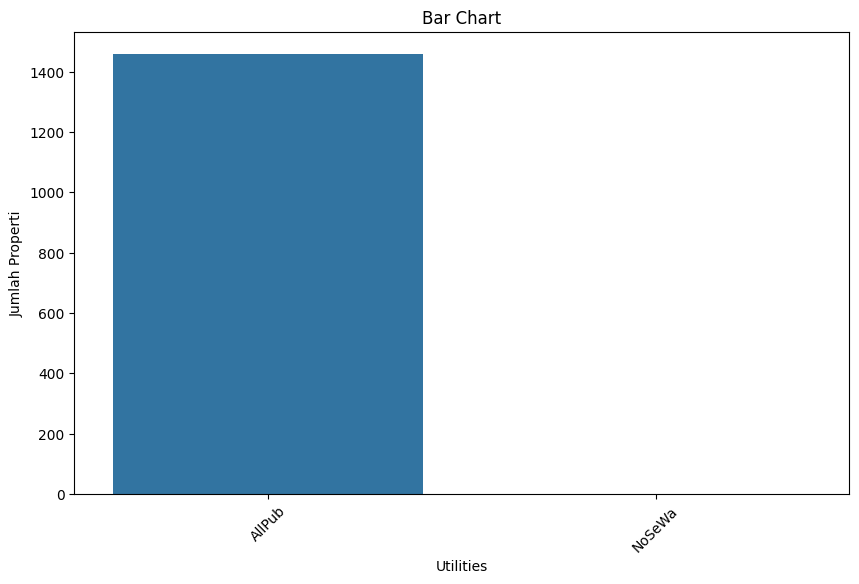

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Utilities', data=df)
plt.title('Bar Chart')
plt.xlabel('Utilities')
plt.ylabel('Jumlah Properti')
plt.xticks(rotation=45)
plt.show()

Analisis:

**Kategori Tidak Seimbang:** Visualisasi menunjukkan bahwa terdapat ketidakseimbangan data (data imbalance) yang signifikan pada variabel "Utilities". Hampir semua properti memiliki utilitas "Allpub", sementara hanya sedikit yang memiliki utilitas "NoSeWa", Itu berarti Hampir semua nilai untuk Utilitas adalah "AllPub".  

In [7]:
df['Utilities'].value_counts()

,count
Utilities,
AllPub,1459
NoSeWa,1


b.HouseStyle

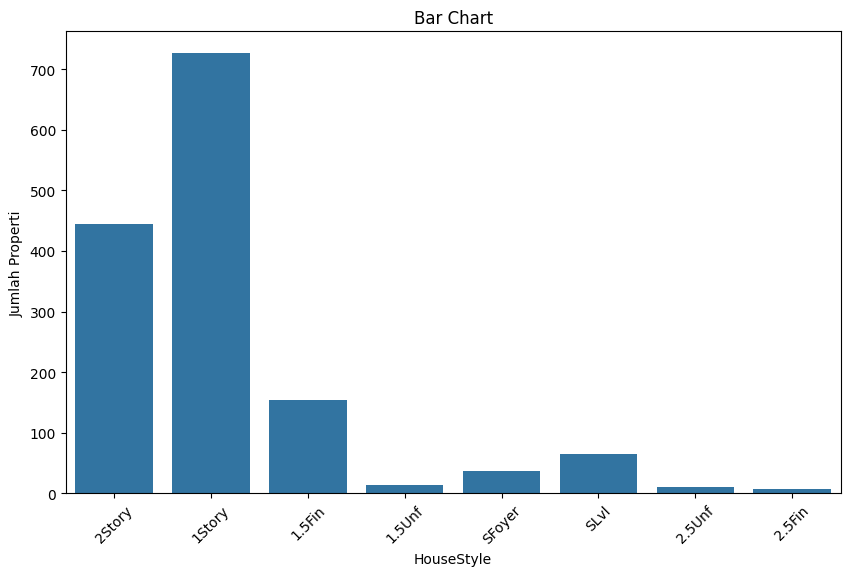

,count
Utilities,
AllPub,1459
NoSeWa,1


In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HouseStyle', data=df)
plt.title('Bar Chart')
plt.xlabel('HouseStyle')
plt.ylabel('Jumlah Properti')
plt.xticks(rotation=45)
plt.show()

df['Utilities'].value_counts()

Jumlah Properti berdasarkan House Style, dapat dianalisis bahwa:

*   Rumah dengan gaya "1Story" (satu lantai) adalah yang paling umum, dengan jumlah properti lebih dari 700.
*   Diikuti oleh tipe "2Story" (dua lantai) dengan jumlah properti sekitar 450.
Tipe "1.5Fin" (satu setengah lantai dengan atap miring) berada di posisi ketiga, dengan jumlah properti sekitar 150.
*   Tipe rumah lainnya seperti "SLvl" (Split Level), "SFoyer" (Split Foyer), "2.5Unf" (dua setengah lantai belum selesai), dan "2.5Fin" (dua setengah lantai dengan atap miring) memiliki jumlah properti yang relatif sedikit, berkisar antara 10 hingga 70.
*   Dari sini dapat disimpulkan bahwa mayoritas properti yang dianalisis memiliki gaya rumah satu lantai atau dua lantai. Tipe rumah lainnya relatif kurang umum.

Dari sini dapat disimpulkan bahwa mayoritas properti yang dianalisis memiliki gaya rumah satu lantai atau dua lantai. Tipe rumah lainnya relatif kurang umum.

c. ExterQual

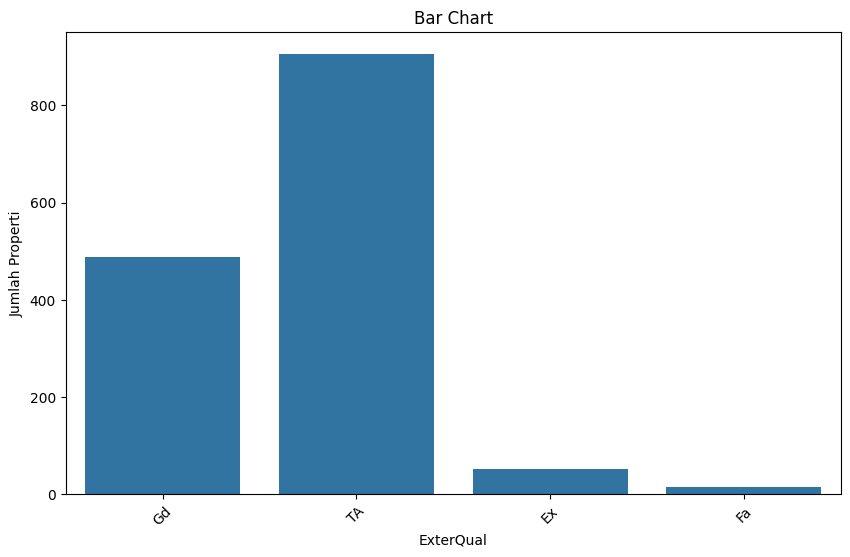

,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ExterQual', data=df)
plt.title('Bar Chart')
plt.xlabel('ExterQual')
plt.ylabel('Jumlah Properti')
plt.xticks(rotation=45)
plt.show()
df['ExterQual'].value_counts()

Analisis:

Visualisasi diatas menunjukkan diagram batang yang menggambarkan jumlah properti berdasarkan kualitas eksterior (ExterQual).

*   Kategori Kualitas: Terdapat empat kategori kualitas eksterior: Gd (Good), TA (Average/Typical), Ex (Excellent), dan Fa (Fair).
*   Jumlah Properti: Kategori TA memiliki jumlah properti terbanyak, diikuti oleh kategori Gd. Kategori Ex dan Fa memiliki jumlah properti yang jauh lebih sedikit.

Kesimpulan: Sebagian besar properti memiliki kualitas eksterior yang baik (Good) atau rata-rata (Average/Typical). Properti dengan kualitas eksterior yang sangat baik (Excellent) atau kurang baik (Fair) relatif jarang.

###5. Visualisasi Histogram untuk Variabel Numerikal

a. SalePrice

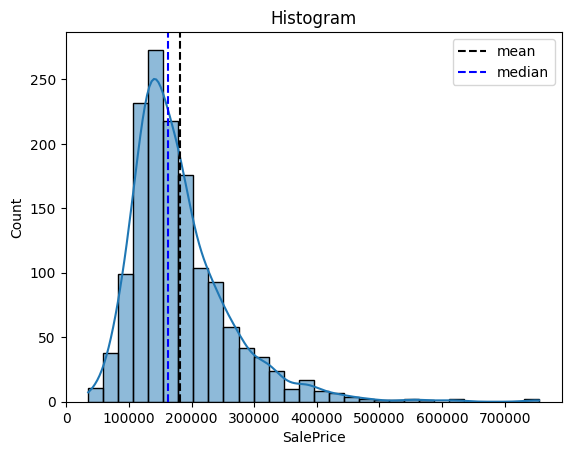

In [10]:
x = data_numerical['SalePrice']
sns.histplot(data_numerical['SalePrice'], bins=30, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc="upper right")
plt.title('Histogram')
plt.show()

Analisis:

*   Bentuk distribusi harga jual rumah tidak simetris karena ini menunjukan tidak terdistribusi secara normal sehingga terlihat miring ke kanan (positive skew).
Hal ini menunjukan harga jual rumah memiliki kecendurungan harga lebih tinggi dari rata-rata.
*   Terdapat garis putus-putus hitam menunjukan mean(rata-rata) harga jual rumah, sedangakan garis biru menunjukan median(nilai tengah). Distribusi SalePrice miring ke kanan itu artinya mean akan lebig besar dari median karena dipengaruhi oleh outlier disisi kanan.




a.1. SalePrice Log-10

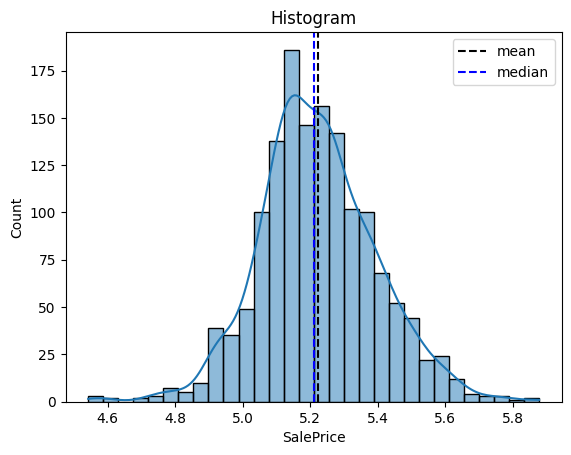

In [11]:
data_numerical['SalePrice'] = np.log10(data_numerical['SalePrice'] + 1)
x = data_numerical['SalePrice']
sns.histplot(data_numerical['SalePrice'], bins=30, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc= 1)
plt.title('Histogram')
plt.show()

Analisis:

* Distribusi terlihat mendekati distribusi normal, meskipun sedikit miring ke kanan (slightly positive skew).
*   Mean dan median yang berdekatan menunjukkan bahwa distribusi data tidak terlalu terpengaruh oleh outlier.


b. GrLivArea

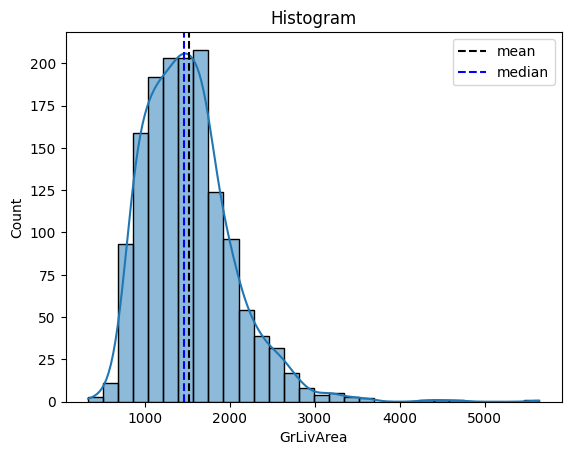

In [12]:
x = data_numerical['GrLivArea']
sns.histplot(data_numerical['GrLivArea'], bins=30, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc="upper right")
plt.title('Histogram')
plt.show()


Gambar ini menunjukkan histogram dari variabel 'GrLivArea' yang kemungkinan besar merepresentasikan luas bangunan. Berikut analisisnya:



*   Bentuk Distribusi: Distribusi data cenderung condong ke kanan (right-skewed). Artinya, terdapat lebih banyak rumah dengan luas bangunan yang lebih kecil dan semakin sedikit rumah dengan luas bangunan yang lebih besar.
Mean vs Median: Garis hitam putus-putus (mean) berada di sebelah kanan garis biru putus-putus (median). Hal ini mengkonfirmasi bahwa distribusi data condong ke kanan, karena mean lebih sensitif terhadap outlier (nilai ekstrem) di sisi kanan distribusi.
*   Kemungkinan Outlier: Terdapat beberapa data poin di sisi kanan distribusi yang jaraknya cukup jauh dari mayoritas data. Data poin ini mengindikasikan kemungkinan adanya outlier, yaitu rumah dengan luas bangunan yang jauh lebih besar dari rata-rata.

**Kesimpulan**:

Secara keseluruhan, histogram ini menunjukkan bahwa luas bangunan rumah dalam dataset ini tidak terdistribusi secara normal. Sebagian besar rumah memiliki luas bangunan yang relatif kecil, dan hanya sedikit rumah yang memiliki luas bangunan yang sangat besar.




b.1. GrLivArea Log-10

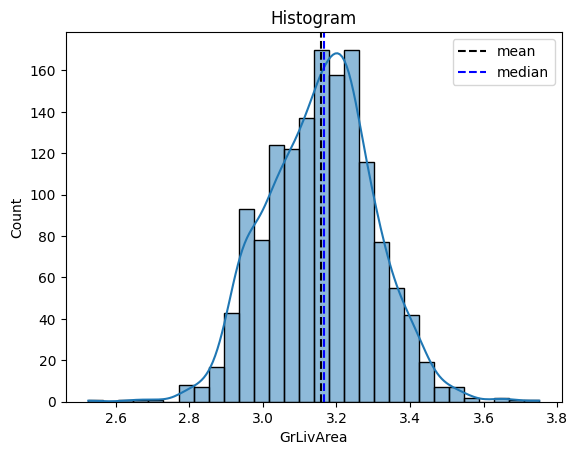

In [13]:
data_numerical['GrLivArea'] = np.log10(data_numerical['GrLivArea'] + 1)
x = data_numerical['GrLivArea']
sns.histplot(data_numerical['GrLivArea'], bins=30, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc= 1)
plt.title('Histogram')
plt.show()

analisisnya:

*   Distribusi mendekati normal: Histogram menunjukkan distribusi data yang lebih mendekati distribusi normal (berbentuk lonceng) dibandingkan dengan histogram 'GrLivArea' sebelum transformasi.
*  Mean dan median hampir berhimpit: Garis putus-putus hitam (mean) dan garis putus-putus biru (median) hampir berhimpit, menunjukkan bahwa data terdistribusi secara simetris.
*  Data lebih terpusat: Transformasi logaritmik membantu mengurangi kemiringan (skewness) pada data 'GrLivArea', sehingga data lebih terpusat di sekitar nilai rata-rata.

Kesimpulannya, transformasi logaritmik pada variabel 'GrLivArea' berhasil membuat distribusi data mendekati normal, yang merupakan asumsi penting dalam banyak model statistik.

c. PoolArea

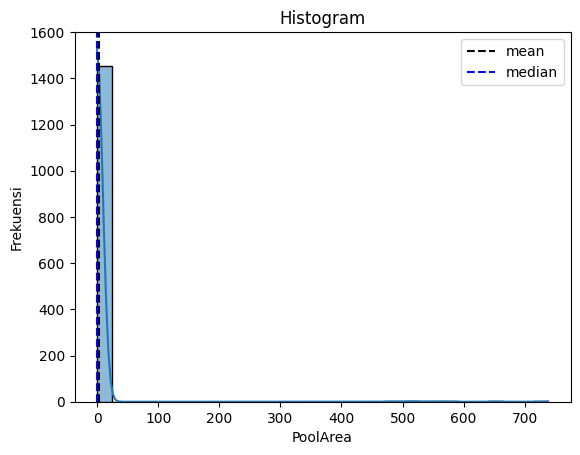

In [14]:
x = data_numerical['PoolArea']
sns.histplot(data_numerical['PoolArea'], bins=30, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc="upper right")
plt.title('Histogram')
plt.xlabel('PoolArea')
plt.ylabel('Frekuensi')
plt.show()

Analisis:

*   Distribusi Data: Histogram menunjukkan bahwa data "PoolArea" (luas kolam renang) sangat menceng ke kanan (highly right-skewed). Sebagian besar data terkonsentrasi di nilai 0, yang menunjukkan bahwa sebagian besar rumah tidak memiliki kolam renang.
*   Mean vs Median: Garis putus-putus hitam (mean) berada di sebelah kanan garis putus-putus biru (median), meskipun perbedaannya tidak terlalu terlihat karena skala sumbu x. Hal ini tetap menunjukkan bahwa data menceng ke kanan.

Kesimpulan:

Sebagian besar rumah tidak memiliki kolam renang. Dari sedikit rumah yang memiliki kolam renang, luasnya bervariasi, dengan beberapa rumah memiliki kolam renang yang relatif besar.

c.2. PoolArea Log-10

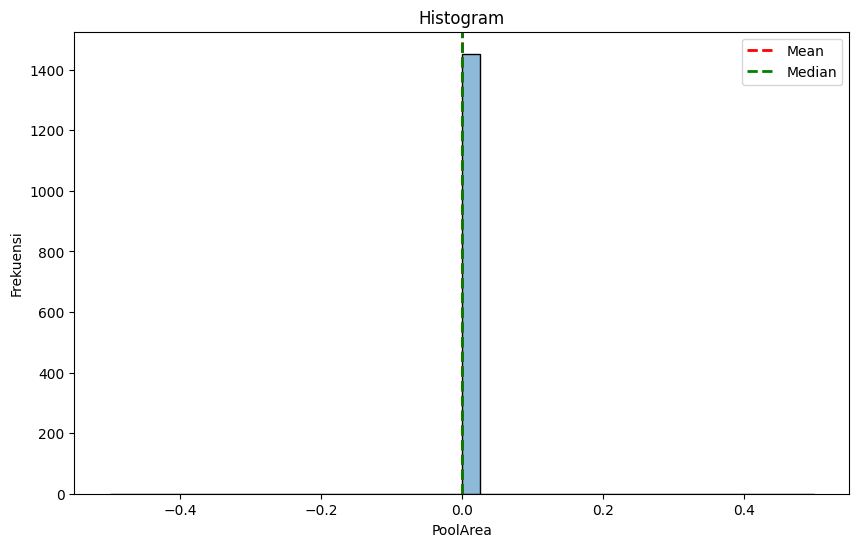

In [15]:
data_numerical['PoolArea'] = data_numerical['PoolArea'][data_numerical['PoolArea'] < 2]
plt.figure(figsize=(10, 6))
sns.histplot(data_numerical['PoolArea'], bins=40, kde=True)
line1 = plt.axvline(x=data_numerical['PoolArea'].mean(), color='red', linestyle='dashed', linewidth=2)
line2 = plt.axvline(x=data_numerical['PoolArea'].median(), color='green', linestyle='dashed', linewidth=2)
plt.legend([line1, line2], ['Mean', 'Median'])
plt.title('Histogram')
plt.xlabel('PoolArea')
plt.ylabel('Frekuensi')
plt.show()

#2D Visualization

##Scatterplot
a. Hubungan antara GrLivArea dan SalePrice

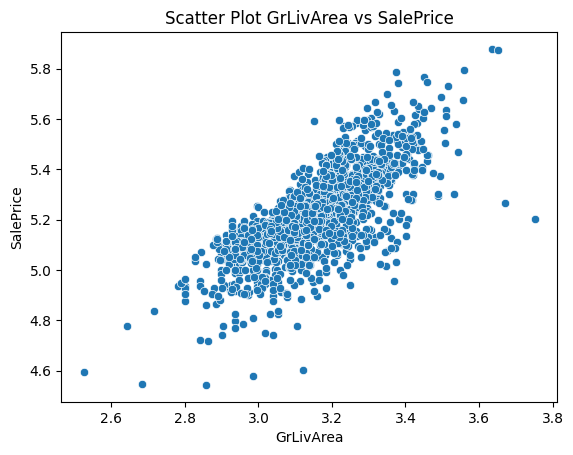

Korelasi antara GrLivArea dan SalePrice: {0.7302537651626402}


In [19]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_numerical)
plt.title('Scatter Plot GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

korelasi = data_numerical['GrLivArea'].corr(data_numerical['SalePrice'])
print('Korelasi antara GrLivArea dan SalePrice:', {korelasi})


Analisis:

*   Terdapat beberapa outlier, yaitu titik data yang berada jauh dari tren umum. Outlier ini bisa jadi merupakan rumah dengan karakteristik unik yang mempengaruhi harga jualnya, seperti lokasi yang sangat strategis atau desain arsitektur yang istimewa.

* SalePrice cukup kuat sebesar 0.73 hal ini hubungan antara kedua variabel ini cukup erat antara variabel GrLivArea yang memiliki pengaruh terhadap SalePrice. Semakin besar nilai variabel GrLivArea semakin tinggi pula variabel SalePrice.



b. Hubungan antara GarageArea dan SalePrice

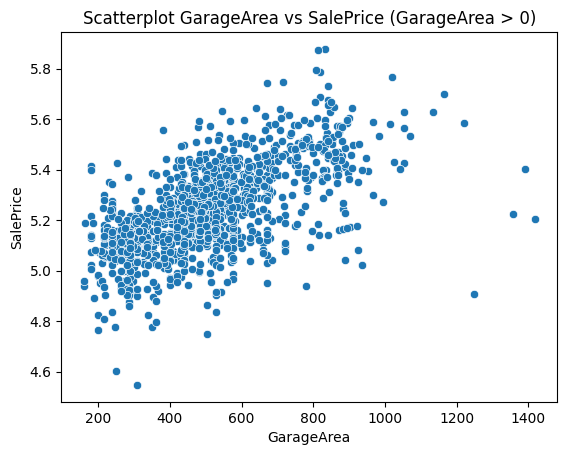

Korelasi antara GarageArea dan SalePrice: {0.6118750219673896}


In [18]:
data_filtered = data_numerical[data_numerical['GarageArea'] > 0]

ax = sns.scatterplot(x='GarageArea', y='SalePrice', data=data_filtered)
plt.title('Scatterplot GarageArea vs SalePrice (GarageArea > 0)')
plt.show()

korelasi = data_filtered['GarageArea'].corr(data_filtered['SalePrice'])
print(f"Korelasi antara GarageArea dan SalePrice:", {korelasi})


Analisis:
*   Seperti pada variabel GrLivArea, saat luas garasi meningkat, harga penjualan juga cenderung meningkat. Ini menunjukkan bahwa adanya garasi yang lebih besar dapat menambah nilai bagi properti.
*   GarageArea > 0 digunakan untuk filter data supaya memberikan hasil yang akurat pada hubungan variabel GarageArea dengan SalePrice. Sebelumnya GarageArea terdapat data outlier

* dengan hasil GarageArea = 0 artinya jika rumah tanpa garasi dapat dianggap tidak relevan dalam analisis hubungan antara GarageArea dan SalePrice

* Korelasi antara hubungan pada variabel ini dengan nilai sebesar 0.61 adalah nilai yang menunjukan antara hubungan tersebut cukup kuat. Artinya kemungkinan harga jual rumah naik karena banyak pembeli rumah beserta terdapat ruangan untuk kendaraan dan penyimpanan (garasi), sehingga ada keterkaitan atau korelasi yang kuat antara GarageArea dengan SalePrice. Jadi semakin meningkatnya nilai variabel GarageArea maka nilai variabel SalePrice juga cenderung meningkat.

### Notes :
Untuk grafiknya better terdapat :
1. Pada gambar harus terdapat judul gambar, dengan code : plt.title(“Linear graph”)
2. harus menampilkan judul label sumbu y, dengan code : plt.ylabel(‘y’)
3. harus menampilkan judul label sumbu x, dengan code : plt.xlabel(‘x’)
4. Coba lakukan filtering untuk variable kolom GarageArea > 0, karena dari hasil plotting diatas kurang masuk akal untuk nilai GarageArea = 0 memiliki SalePrice padahal GarageArea merupakan nilai yg seharusnya tidak nol, berikan insightnya kenapa GarageArea > 0 ?
5. Coba tampilkan nilai korelasi antar kolom tersebut selain dalam visualisasi, seperti korelasi : Korelasi SalePrice dengan GrLivArea, Korelasi SalePrice dengan GarageArea lalu simpulkan korelasinya lemah atau kuat. Referensi : https://nakita.grid.id/read/023681143/pengertian-analisis-korelasi-materi-bab-3-statistika-kelas-xi-sma-kurikulum-merdeka?page=all
